### 📌 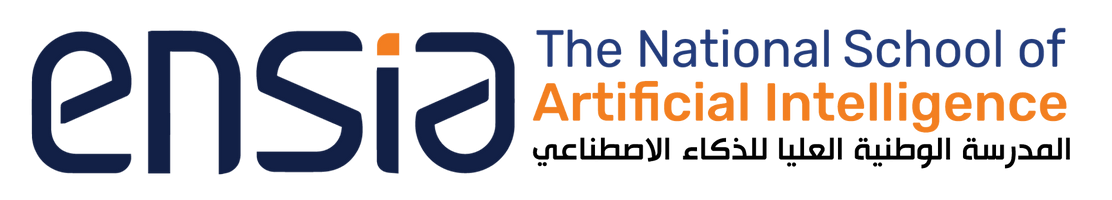


This is the notebook submission concerning TSA gruop project 2024/2025


### Team Members


- Bilal Fellah (Team Leader)
- Abderrahmane Memmou
- Raid Makhloufi
- Takieddine Herbadji
- Badis Zahreddine Achacha
- Othmane Abderrahime Fiche


# Methodology


## 🧠 Methodology

To address the classification task using EEG time series data, the following steps were taken:

### 1. Data Understanding & Preprocessing

- The dataset consists of multivariate EEG recordings, where each row represents one individual’s EEG signal over time.
- Each sample is treated as a 1D time series signal.
- Normalization is applied to ensure consistent scaling across all time steps, facilitating model training.

### 2. Feature Extraction

- **Welch’s method** is used to convert time-domain EEG signals into the frequency domain:

  - Estimates the Power Spectral Density (PSD) of the signal.
  - Captures how signal power is distributed across different frequencies.
  - Useful for identifying patterns in standard EEG bands (alpha, beta, theta, delta).

- **Wavelet transformation** is used to capture both frequency and time-localized features:
  - Allows decomposition of EEG signals into different frequency components with temporal resolution.
  - Extracts rich, non-stationary patterns typical in EEG data.
  - Useful for detecting transient brain activity or shifts in cognitive state over time.

-both methods has successfully improved model performance, but the results are still not very accurate

### 3. Model Training

- Several machine learning models were trained and hyperparameter-tuned:
  - `K-Nearest Neighbors (KNN)`
  - `Decision Tree`
  - `Random Forest`
  - `Support Vector Machine (SVM)`
  - `Naive Bayes`
  - `Artificial Neural Network (ANN)`
- A final `Multi-Layer Perceptron (MLP)` model was also trained using the extracted features.

### 4. Evaluation

- Models were evaluated based on:
  - **Accuracy**
  - **Precision, Recall, and F1-score** per class
  - **Macro and Weighted Averages**
- The MLP achieved the best performance with **81.2% accuracy**, significantly outperforming classical models and indicating strong learning of EEG-based features.


<p style={marginTop = "100px"}></p>


# **Implementation**


## 📦 Importing Libraries & Loading Data

Here we import the necessary libraries and load the dataset for wavelet-based time series analysis.


In [1]:
import pandas as pd

# Load the CSV file 
file_path = '../data/Sleep Train 5000.csv'  
df = pd.read_csv(file_path, header=None)  # no column names

# Target variable (first column with labels 0 to 4)
y = df.iloc[:, 0]

# Features (all columns except the first)
X = df.iloc[:, 1:]


### 📌 ## 1-2-Data Shape


In [2]:
# Display basic info
print("Shape of the dataset:" )
df.shape

Shape of the dataset:


(4999, 179)

In [3]:
print("\nFirst 5 rows:")
df.head()


First 5 rows:


,0,1,2,3,4,5,6,7,8,9,...,169,170,171,172,173,174,175,176,177,178
0,0,-1.608303,-13.170696,-8.997802,1.347497,5.259585,-1.521367,2.651526,4.651038,3.781685,...,-8.041514,-6.563614,-4.998779,-5.346520,-6.389744,-11.171185,-2.390720,1.086691,6.911355,6.128938
1,0,-2.825397,2.390720,3.955555,-4.216361,2.477656,2.129914,3.955555,-5.172649,5.694261,...,4.129426,7.085226,-2.390720,-2.303785,-3.694750,4.564103,-6.215873,-2.738462,-4.477167,-4.390232
2,0,-15.952625,-3.347008,-15.517949,-9.432479,-16.474237,-6.650549,-14.909402,-12.214408,-10.823443,...,-4.390232,-0.738950,4.477167,12.996825,21.951160,21.081806,21.603418,14.909402,9.345543,6.998291
3,0,-26.558731,-18.560684,-12.040537,-4.216361,-9.432479,1.260562,-2.216850,-3.520879,-5.781197,...,-3.086203,-0.652015,3.607814,15.170208,16.039560,6.128938,3.955555,-1.956044,-2.390720,-4.651038
4,0,-5.607326,6.042003,-4.129426,-5.172649,-7.172161,-11.953602,-7.780708,-0.130403,-2.912332,...,-1.260562,1.608303,4.564103,-4.911844,10.301831,10.127961,8.389256,-2.216850,-4.390232,0.478144


### 📌 ## 1-3-Missing Data


In [4]:
# Check for missing values
# Show only columns with missing values
missing = df.isnull().sum()
print("\nColumns with missing values:")
print(missing[missing > 0]) 


Columns with missing values:
Series([], dtype: int64)


## 📊 Evaluation & Results

We evaluate the trained model using classification metrics to assess performance.


### 📌 ## 1-4- Summary statistics for all variables


In [5]:
# Summary statistics for all variables


# Set multiple display options to avoid truncation
pd.set_option('display.max_columns', None)      # Show all columns
pd.set_option('display.max_rows', None)         # Show all rows
pd.set_option('display.max_colwidth', None)     # Show full column content
pd.set_option('display.width', 200)            # Increase total print width



summary=df.describe(include='all')
summary=summary.transpose()
summary.head(10)

,count,mean,std,min,25%,50%,75%,max
0,4999.0,2.164633,1.153444,0.000000,2.000000,2.000000,3.000000,4.000000
1,4999.0,-0.554607,17.789305,-146.094760,-9.345543,-0.391209,8.062149,105.409035
2,4999.0,-0.564193,17.597088,-82.371185,-9.258608,-0.652015,8.041514,95.585350
3,4999.0,-0.540193,17.681466,-81.849570,-9.519414,-0.652015,8.215385,91.934070
4,4999.0,-0.649433,17.723401,-90.543100,-9.693284,-0.738950,8.215385,109.668860
5,4999.0,-0.753712,17.403211,-90.803910,-9.432479,-0.738950,7.883883,87.065690
6,4999.0,-1.075914,17.384649,-103.409520,-9.693284,-0.999756,7.780708,87.413430
7,4999.0,-1.181350,17.279831,-83.588280,-10.127961,-1.260562,7.443468,77.850550
8,4999.0,-1.451674,17.366649,-83.588280,-10.562637,-1.347497,7.172161,112.972404
9,4999.0,-1.382415,17.506116,-136.705730,-10.301831,-1.608303,7.432967,86.283270


## 📈 Visualization

Graphical representation of data and results to gain better insights.


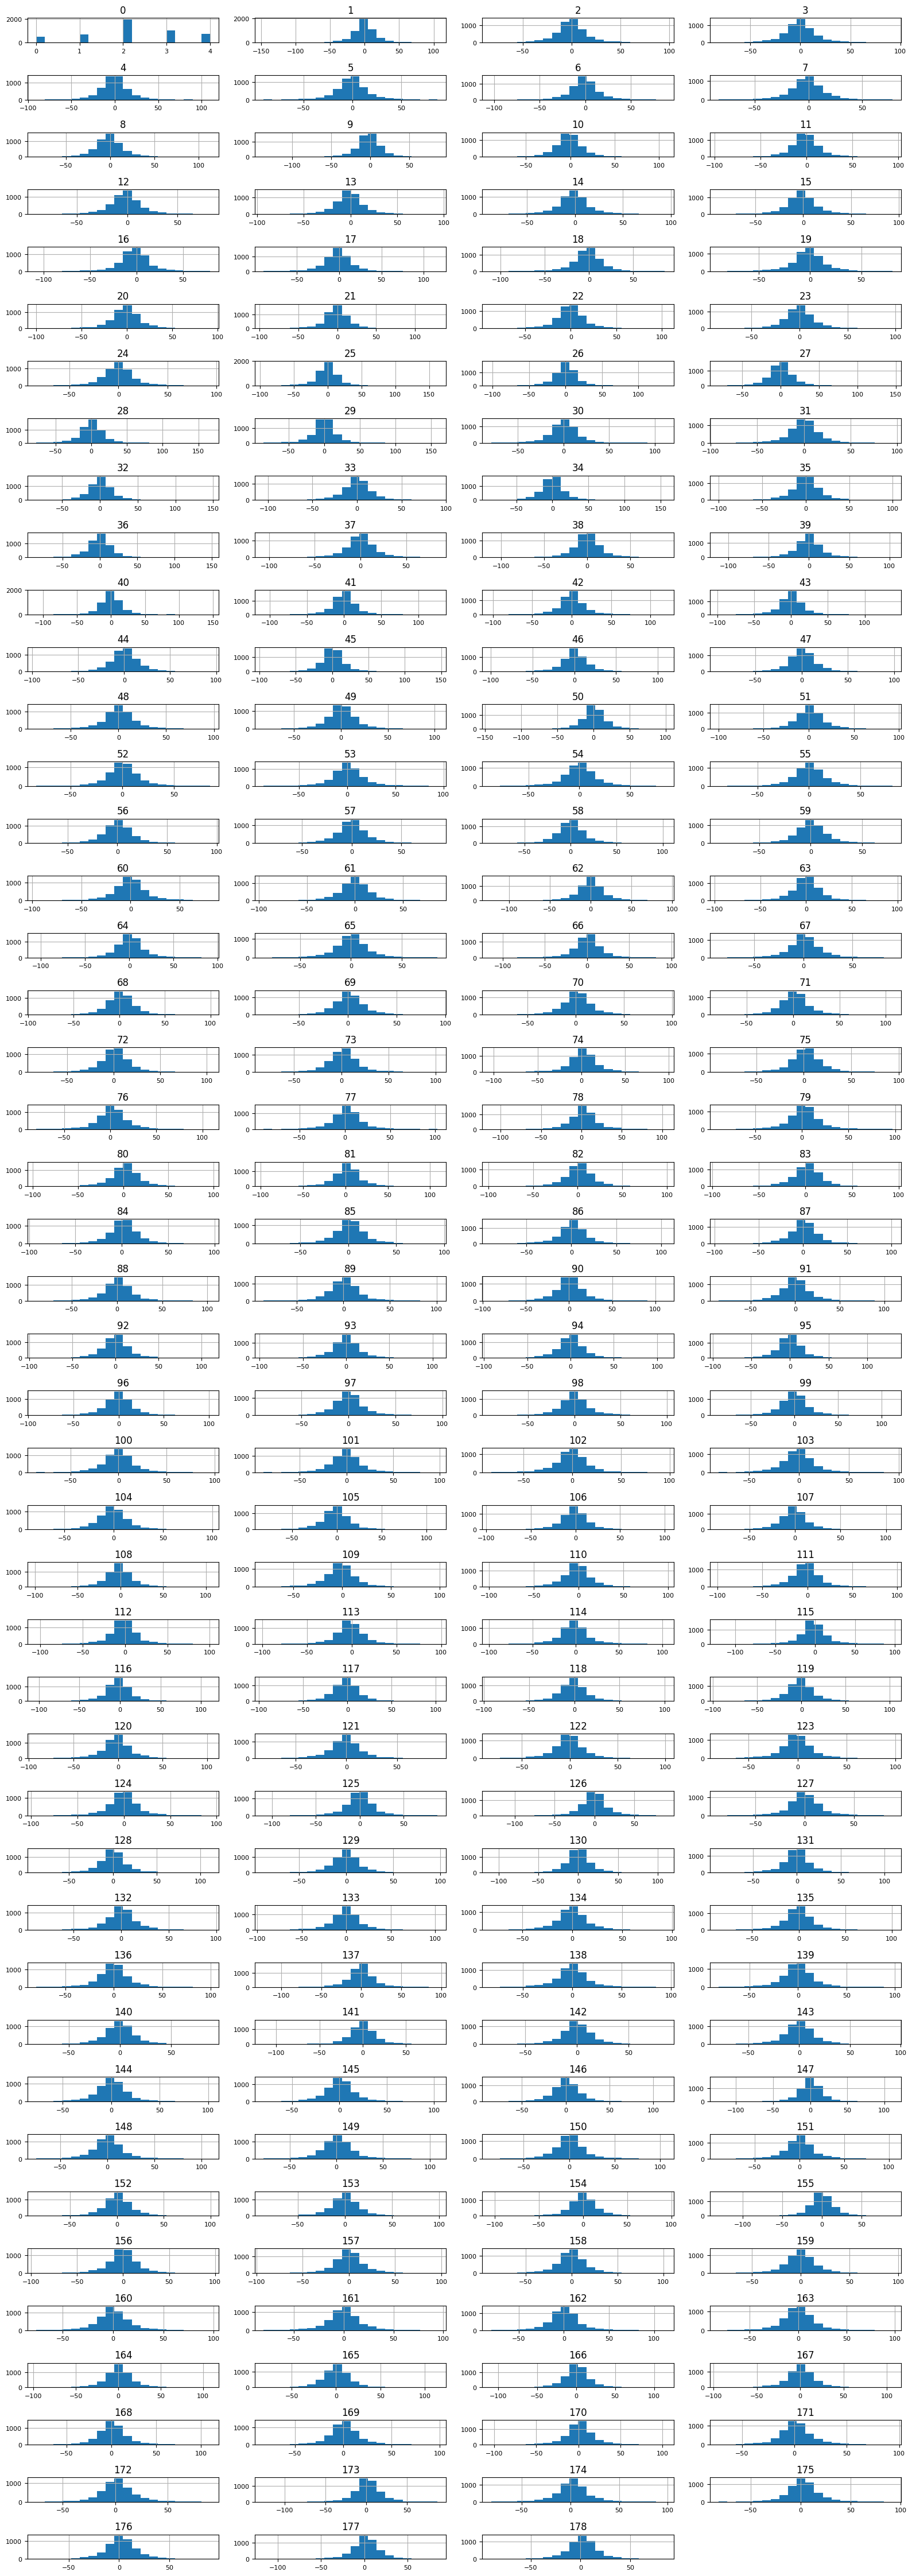

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Select numeric columns only
numerical = df.select_dtypes(include=[np.number]).columns.tolist()

# Define the number of columns you want
num_columns = 4

# Calculate the number of rows needed
num_rows = int(np.ceil(len(numerical) / num_columns))

# Adjust the figure size based on the number of rows
figsize = (16, 45)

# Plot histograms
df[numerical].hist(
    bins=20,
    figsize=figsize,  # adjust size dynamically
    layout=(num_rows, num_columns),  # ensure histograms are arranged in columns
    xlabelsize=8,
    ylabelsize=8
)

plt.tight_layout()
plt.show()

### 📌 ## 1-6- Mean, Min, and Max Trends Across Features


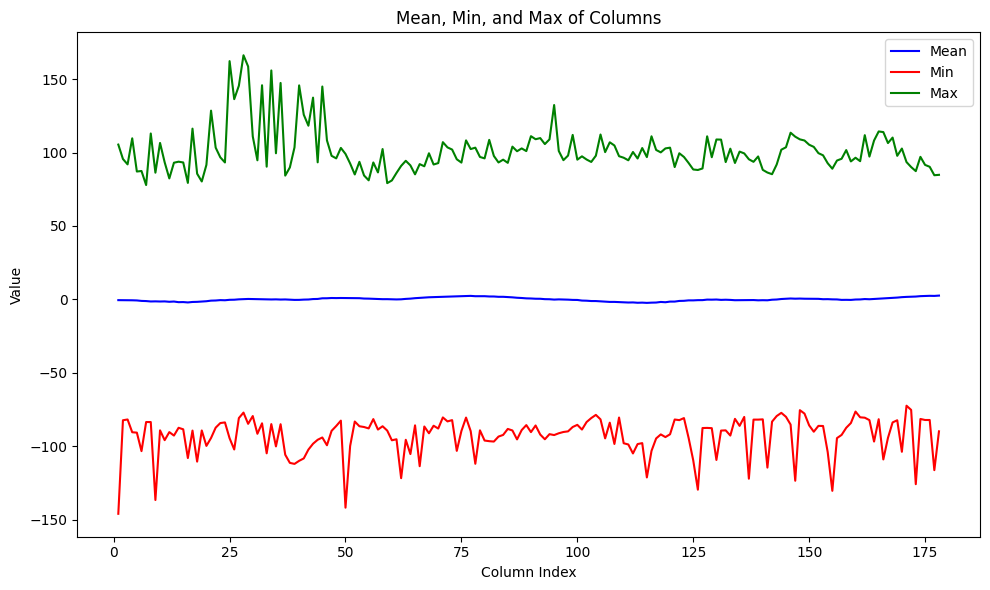

In [7]:

# Calculate mean, min, and max for each column
mean_values = X.mean()
min_values = X.min()
max_values = X.max()

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the mean, min, and max values
plt.plot(mean_values, label='Mean', color='blue')
plt.plot(min_values, label='Min', color='red')
plt.plot(max_values, label='Max', color='green')

# Add labels and title
plt.xlabel('Column Index')
plt.ylabel('Value')
plt.title('Mean, Min, and Max of Columns')

# Display legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


## 📈 Visualization

Graphical representation of data and results to gain better insights.


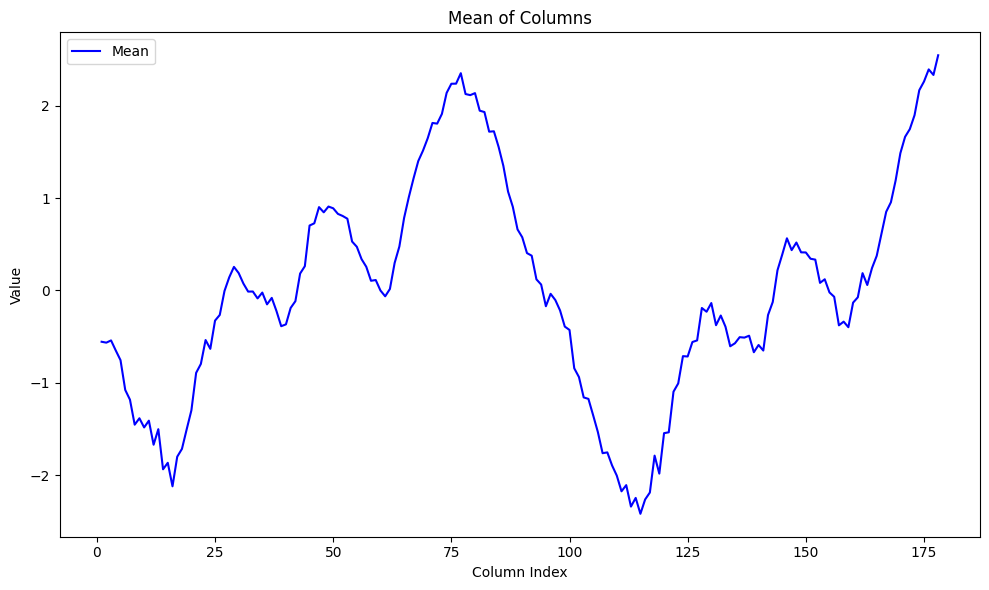

In [8]:
plt.figure(figsize=(10, 6))

plt.plot(mean_values, label='Mean', color='blue')

# Add labels and title
plt.xlabel('Column Index')
plt.ylabel('Value')
plt.title('Mean of Columns')

# Display legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [9]:
df.duplicated().sum()

np.int64(0)

### 📌 there are no duplicates


In [10]:
df.to_csv('../data/preprocessed.csv',index=False,header=True)

### 📌 # Dimensionality Reduction


In [11]:
cov_matrix = np.cov(df.T)

In [12]:
eigenvalues, _ = np.linalg.eigh(cov_matrix)  # ascending order
eigenvalues = eigenvalues[::-1]  # descending order


In [13]:
explained_variance_ratio = eigenvalues / eigenvalues.sum()
cumulative_variance = np.cumsum(explained_variance_ratio)


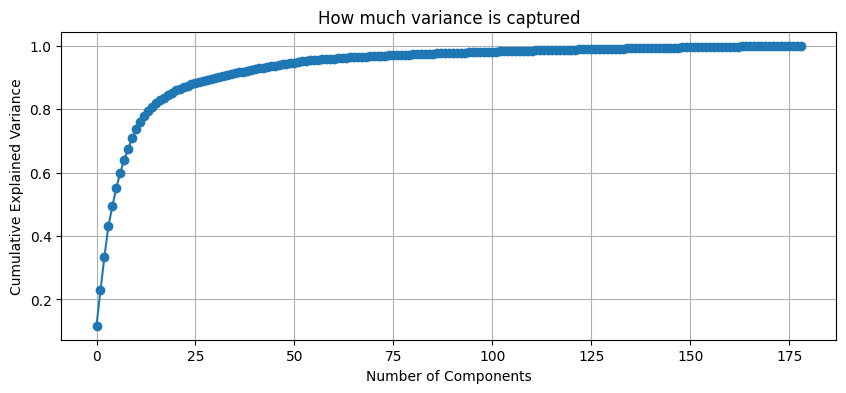

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('How much variance is captured')
plt.grid(True)
plt.show()


### 📌 we can keep the same variance ratio with less number of components


In [15]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=[0]), df[0], test_size=0.2, random_state=42, stratify=y)

In [16]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_pca = pca.fit_transform(X_train)

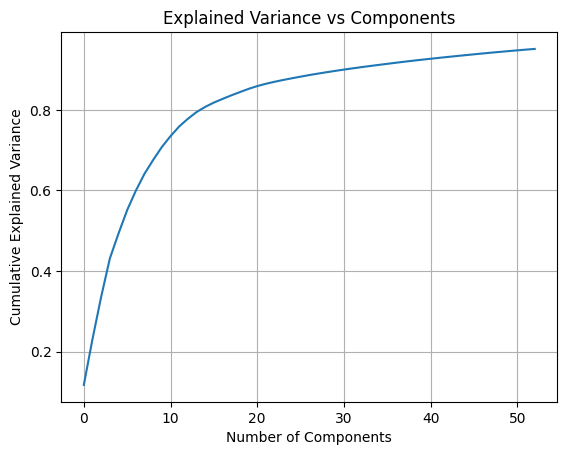

In [17]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Components')
plt.grid(True)
plt.show()


In [18]:
X_train.to_csv('../data/PCA_X_train.csv', index=False, header=True)
X_test.to_csv('../data/PCA_X_test.csv', index=False, header=True)
y_train.to_csv('../data/PCA_y_train.csv', index=False, header=True) 
y_test.to_csv('../data/PCA_y_test.csv', index=False, header=True)

### 📌 # Feature Engineering


In [19]:
from scipy.signal import welch
import math

In [20]:
def bandpower(data, sf, band, window_sec=None):
    band = np.array(band)
    freqs, psd = welch(data, sf, nperseg=int(window_sec * sf) if window_sec else None)
    idx_band = np.logical_and(freqs >= band[0], freqs <= band[1])
    return np.trapz(psd[idx_band], freqs[idx_band])  # Integral over the band


In [21]:
bands = {
    'delta': (0.5, 4),
    'theta': (4, 8),
    'alpha': (8, 12),
    'beta': (12, 30),
    'gamma': (30, math.inf) 
}


In [22]:
def extract_spectral_features(eeg_df, sf=250):
    features = []

    for i, row in eeg_df.iterrows():
        signal = row.values  # 1D EEG signal
        person_features = {}
        total_power = bandpower(signal, sf, (0.5, 100))  # Total power for normalization

        for band_name, band_range in bands.items():
            power = bandpower(signal, sf, band_range)
            person_features[f"{band_name}_power"] = power
            person_features[f"{band_name}_rel_power"] = power / total_power if total_power != 0 else 0
        
        features.append(person_features)

    return pd.DataFrame(features)


In [23]:
data = pd.read_csv('../data/preprocessed.csv')
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,2.164633,-0.554607,-0.564193,-0.540193,-0.649433,-0.753712,-1.075914,-1.181350,-1.451674,-1.382415,-1.481303,-1.408250,-1.668424,-1.500378,-1.934247,-1.863973,-2.118384,-1.798099,-1.713337,-1.501901,-1.295991,-0.891109,-0.794561,-0.535992,-0.631155,-0.325837,-0.264498,-0.005188,0.142182,0.255388,0.188488,0.075197,-0.011814,-0.011063,-0.085702,-0.022604,-0.150002,-0.079922,-0.222500,-0.386323,-0.366355,-0.188497,-0.115785,0.183128,0.262810,0.702641,0.726795,0.901839,0.845627,0.908142,0.889212,0.828712,0.806190,0.776415,0.529373,0.472791,0.339247,0.256351,0.105121,0.113152,-0.000305,-0.062791,0.016548,0.298280,0.475912,0.784468,1.009709,1.212652,1.400192,1.513328,1.647189,1.812372,1.805169,1.910261,2.137645,2.236431,2.237512,2.350663,2.125316,2.113357,2.135078,1.945224,1.930379,1.718069,1.722143,1.552681,1.348522,1.069231,0.905773,0.660864,0.575838,0.404556,0.376419,0.120517,0.064115,-0.170246,-0.036050,-0.103463,-0.216072,-0.390449,-0.426852,-0.841463,-0.936936,-1.156669,-1.172632,-1.349657,-1.531581,-1.760125,-1.751299,-1.892210,-2.002352,-2.172337,-2.105608,-2.337704,-2.243865,-2.415676,-2.260605,-2.185374,-1.786351,-1.981298,-1.543476,-1.533999,-1.094823,-1.005303,-0.710418,-0.713914,-0.557291,-0.540019,-0.189297

In [24]:
eeg_df = data.drop(columns=['0'])
labels = data['0']

In [25]:

# Step 2: Extract features
spectral_features_df = extract_spectral_features(eeg_df, sf=250)

# Step 3: Merge with labels and proceed to model training
# labels = pd.read_csv("labels.csv")
full_df = spectral_features_df.join(labels)


c:\Users\Bilal\anaconda3\envs\DM_env\Lib\site-packages\scipy\signal\_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 178, using nperseg = 178
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
C:\Users\Bilal\AppData\Local\Temp\ipykernel_5556\2881372007.py:5: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(psd[idx_band], freqs[idx_band])  # Integral over the band


### 📌 ## Simple Test


## 📊 Evaluation & Results

We evaluate the trained model using classification metrics to assess performance.


In [26]:
X = eeg_df
X_processed = spectral_features_df

y = labels

### 📌 ### The original data


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.38      0.03      0.05       102
           1       0.50      0.07      0.12       140
           2       0.51      0.83      0.63       400
           3       0.70      0.79      0.74       208
           4       0.41      0.24      0.30       150

    accuracy                           0.54      1000
   macro avg       0.50      0.39      0.37      1000
weighted avg       0.52      0.54      0.48      1000



### 📌 ### The processed data


In [29]:
processed_X_train, processed_X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42, stratify=y)


In [30]:


clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(processed_X_train, y_train)

# Predict
y_pred = clf.predict(processed_X_test)

# Evaluate
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.58      0.50      0.54       102
           1       0.47      0.28      0.35       140
           2       0.56      0.65      0.60       400
           3       0.69      0.77      0.73       208
           4       0.46      0.40      0.43       150

    accuracy                           0.57      1000
   macro avg       0.55      0.52      0.53      1000
weighted avg       0.56      0.57      0.56      1000



we notice improvement in the model performance, especially for the recall and f1-score

which means that this model predicts non-dominant classes better.
There is a clear reduction for the training time as well


## 🌊 Wavelet Transformation

We apply Discrete Wavelet Transform (DWT) to extract features from the time series data.


In [31]:
eeg_df.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,-0.554607,-0.564193,-0.540193,-0.649433,-0.753712,-1.075914,-1.181350,-1.451674,-1.382415,-1.481303,-1.408250,-1.668424,-1.500378,-1.934247,-1.863973,-2.118384,-1.798099,-1.713337,-1.501901,-1.295991,-0.891109,-0.794561,-0.535992,-0.631155,-0.325837,-0.264498,-0.005188,0.142182,0.255388,0.188488,0.075197,-0.011814,-0.011063,-0.085702,-0.022604,-0.150002,-0.079922,-0.222500,-0.386323,-0.366355,-0.188497,-0.115785,0.183128,0.262810,0.702641,0.726795,0.901839,0.845627,0.908142,0.889212,0.828712,0.806190,0.776415,0.529373,0.472791,0.339247,0.256351,0.105121,0.113152,-0.000305,-0.062791,0.016548,0.298280,0.475912,0.784468,1.009709,1.212652,1.400192,1.513328,1.647189,1.812372,1.805169,1.910261,2.137645,2.236431,2.237512,2.350663,2.125316,2.113357,2.135078,1.945224,1.930379,1.718069,1.722143,1.552681,1.348522,1.069231,0.905773,0.660864,0.575838,0.404556,0.376419,0.120517,0.064115,-0.170246,-0.036050,-0.103463,-0.216072,-0.390449,-0.426852,-0.841463,-0.936936,-1.156669,-1.172632,-1.349657,-1.531581,-1.760125,-1.751299,-1.892210,-2.002352,-2.172337,-2.105608,-2.337704,-2.243865,-2.415676,-2.260605,-2.185374,-1.786351,-1.981298,-1.543476,-1.533999,-1.094823,-1.005303,-0.710418,-0.713914,-0.557291,-0.540019,-0.189297,-0.229732,-0.135890,-0

In [32]:
# y = df.iloc[:, 0].values  # class labels
X = eeg_df.iloc[:, 1:].values  # time series signals

In [33]:
import pywt

# Choose wavelet and level
wavelet = 'db4'
level = 1

# Apply DWT to each row
X_wavelet = []

for row in X:
    coeffs = pywt.wavedec(row, wavelet, level=level)
    # coeffs[0] = approximation, coeffs[1:] = detail coefficients
    X_wavelet.append(coeffs[0])  # keep only approximation (or combine if you want more detail)

X_wavelet = np.array(X_wavelet)


In [34]:
print("Original shape:", X.shape)
print("Transformed shape:", X_wavelet.shape)


Original shape: (4999, 177)
Transformed shape: (4999, 92)


In [35]:
X_Wv_df = pd.DataFrame(X_wavelet)

In [36]:
X_Wv_df.to_csv('../data/X_Wv_df.csv', index=False)

### 📌 # 3-Model Building:


## 📦 Importing Libraries & Loading Data

Here we import the necessary libraries and load the dataset for wavelet-based time series analysis.


In [37]:
import pandas as pd

# Load processed data
df_processed = pd.read_csv("../data/preprocessed.csv")
X_processed = df_processed.drop(columns=['0'])

y = pd.read_csv("../data/processed_y_spectral.csv")

# Convert y back to a pandas Series 
y = y.squeeze()


In [38]:
X_processed.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,-0.554607,-0.564193,-0.540193,-0.649433,-0.753712,-1.075914,-1.181350,-1.451674,-1.382415,-1.481303,-1.408250,-1.668424,-1.500378,-1.934247,-1.863973,-2.118384,-1.798099,-1.713337,-1.501901,-1.295991,-0.891109,-0.794561,-0.535992,-0.631155,-0.325837,-0.264498,-0.005188,0.142182,0.255388,0.188488,0.075197,-0.011814,-0.011063,-0.085702,-0.022604,-0.150002,-0.079922,-0.222500,-0.386323,-0.366355,-0.188497,-0.115785,0.183128,0.262810,0.702641,0.726795,0.901839,0.845627,0.908142,0.889212,0.828712,0.806190,0.776415,0.529373,0.472791,0.339247,0.256351,0.105121,0.113152,-0.000305,-0.062791,0.016548,0.298280,0.475912,0.784468,1.009709,1.212652,1.400192,1.513328,1.647189,1.812372,1.805169,1.910261,2.137645,2.236431,2.237512,2.350663,2.125316,2.113357,2.135078,1.945224,1.930379,1.718069,1.722143,1.552681,1.348522,1.069231,0.905773,0.660864,0.575838,0.404556,0.376419,0.120517,0.064115,-0.170246,-0.036050,-0.103463,-0.216072,-0.390449,-0.426852,-0.841463,-0.936936,-1.156669,-1.172632,-1.349657,-1.531581,-1.760125,-1.751299,-1.892210,-2.002352,-2.172337,-2.105608,-2.337704,-2.243865,-2.415676,-2.260605,-2.185374,-1.786351,-1.981298,-1.543476,-1.533999,-1.094823,-1.005303,-0.710418,-0.713914,-0.557291,-0.540019,-0.189297,-0.229732,-0.135890,-0

### 📌 ## Step 2: Split the Data


In [39]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
processed_X_train, processed_X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y
)

### 📌 ## Step 3: Build and Train our Models


### 📌 1. Choose Your Candidate Models


In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from xgboost import XGBClassifier

### 📌 2. Initialize the Models


In [41]:


models = {
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "ANN": MLPClassifier(max_iter=1000, random_state=42),
    "Naive Bayes": GaussianNB()  
}


### 📌 3. Train the Models


In [42]:
# Train models
for name, model in models.items():
    model.fit(processed_X_train, y_train)
    print(f"{name} trained successfully!")


KNN trained successfully!
Decision Tree trained successfully!
Random Forest trained successfully!
SVM trained successfully!
ANN trained successfully!
Naive Bayes trained successfully!


### 📌 4. Evaluate the Models on the Test Data


In [43]:
from sklearn.metrics import accuracy_score

# Evaluate each model
for name, model in models.items():
    y_pred = model.predict(processed_X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")


KNN Accuracy: 0.3390
Decision Tree Accuracy: 0.3760
Random Forest Accuracy: 0.5320
SVM Accuracy: 0.5340
ANN Accuracy: 0.4560
Naive Bayes Accuracy: 0.4090


### 📌 ## Step 4: Hyperparameter Tuning


In [44]:
from sklearn.model_selection import GridSearchCV


### 📌 1. Define Hyperparameter Grid


In [45]:
param_grids = {
    
    "KNN": {
        "n_neighbors": [3, 5, 7, 9, 500],
        "weights": ["uniform", "distance"],
        "metric": ["euclidean", "manhattan"]
    },
    "Decision Tree": {
        "max_depth": [3, 5, 10, 20, None],
        "min_samples_split": [2, 5, 10, 20],
        "min_samples_leaf": [1, 2, 4, 8]
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [10, 20, None],
        "min_samples_split": [2, 5, 10, 20],
        "min_samples_leaf": [1, 2, 4]
    },
   
    "ANN": {
        "hidden_layer_sizes": [(50,), (100,), (50, 50)],
        "activation": ["relu", "tanh"],
        "solver": ["adam", "sgd"],
        "alpha": [0.0001, 0.001],
        "learning_rate": ["constant", "adaptive"]
    },
    "XGBoost": {
        'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    }
    
}


### 📌 2. Perform Grid Search


In [46]:
from sklearn.model_selection import GridSearchCV

best_models = {}

for name, model in models.items():
    print(f"\n🔍 Tuning hyperparameters for: {name}")
    
    if name in param_grids:
        # Perform grid search
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grids[name],
            cv=5,
            scoring='accuracy',
            n_jobs=-1,
            verbose=1
        )
        grid_search.fit(processed_X_train, y_train)
        best_models[name] = grid_search.best_estimator_
        
        print(f"✅ Best hyperparameters for {name}: {grid_search.best_params_}")
        print(f"📈 Best cross-validation accuracy: {grid_search.best_score_:.4f}")
    else:
        # No hyperparameters to tune
        model.fit(processed_X_train, y_train)
        best_models[name] = model
        
        print(f"⚠️ No hyperparameters tuned for {name}. Model trained with default settings.")



🔍 Tuning hyperparameters for: KNN
Fitting 5 folds for each of 20 candidates, totalling 100 fits
✅ Best hyperparameters for KNN: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
📈 Best cross-validation accuracy: 0.3681

🔍 Tuning hyperparameters for: Decision Tree
Fitting 5 folds for each of 80 candidates, totalling 400 fits
✅ Best hyperparameters for Decision Tree: {'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 20}
📈 Best cross-validation accuracy: 0.4451

🔍 Tuning hyperparameters for: Random Forest
Fitting 5 folds for each of 108 candidates, totalling 540 fits
✅ Best hyperparameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
📈 Best cross-validation accuracy: 0.5196

🔍 Tuning hyperparameters for: SVM
⚠️ No hyperparameters tuned for SVM. Model trained with default settings.

🔍 Tuning hyperparameters for: ANN
Fitting 5 folds for each of 48 candidates, totalling 240 fits
✅ Best hyperparameters fo

### 📌 3. Evaluate the Best Models


In [47]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluate the best models
for name, model in best_models.items():
    y_pred = model.predict(processed_X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} (Tuned) Accuracy: {acc:.4f}")
    print(f"Classification Report for {name} (Tuned):")
    print(classification_report(y_test, y_pred))


KNN (Tuned) Accuracy: 0.3570
Classification Report for KNN (Tuned):
              precision    recall  f1-score   support

           0       0.28      0.48      0.36       102
           1       0.23      0.24      0.23       140
           2       0.44      0.33      0.38       400
           3       0.82      0.40      0.54       208
           4       0.21      0.41      0.28       150

    accuracy                           0.36      1000
   macro avg       0.40      0.37      0.36      1000
weighted avg       0.44      0.36      0.37      1000

Decision Tree (Tuned) Accuracy: 0.4580
Classification Report for Decision Tree (Tuned):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       102
           1       0.00      0.00      0.00       140
           2       0.42      0.91      0.58       400
           3       0.68      0.46      0.55       208
           4       0.00      0.00      0.00       150

    accuracy                 

c:\Users\Bilal\anaconda3\envs\DM_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Bilal\anaconda3\envs\DM_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Bilal\anaconda3\envs\DM_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM (Tuned) Accuracy: 0.5340
Classification Report for SVM (Tuned):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       102
           1       0.17      0.01      0.01       140
           2       0.51      0.80      0.62       400
           3       0.70      0.79      0.74       208
           4       0.36      0.33      0.35       150

    accuracy                           0.53      1000
   macro avg       0.35      0.39      0.35      1000
weighted avg       0.43      0.53      0.46      1000

ANN (Tuned) Accuracy: 0.4580
Classification Report for ANN (Tuned):
              precision    recall  f1-score   support

           0       0.34      0.29      0.32       102
           1       0.25      0.26      0.26       140
           2       0.53      0.49      0.51       400
           3       0.62      0.67      0.65       208
           4       0.33      0.37      0.35       150

    accuracy                           0.46      

c:\Users\Bilal\anaconda3\envs\DM_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Bilal\anaconda3\envs\DM_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Bilal\anaconda3\envs\DM_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### 📌 4. visualize the Model accuracies


C:\Users\Bilal\AppData\Local\Temp\ipykernel_5556\291079475.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Model', y='Accuracy', palette='Set2')


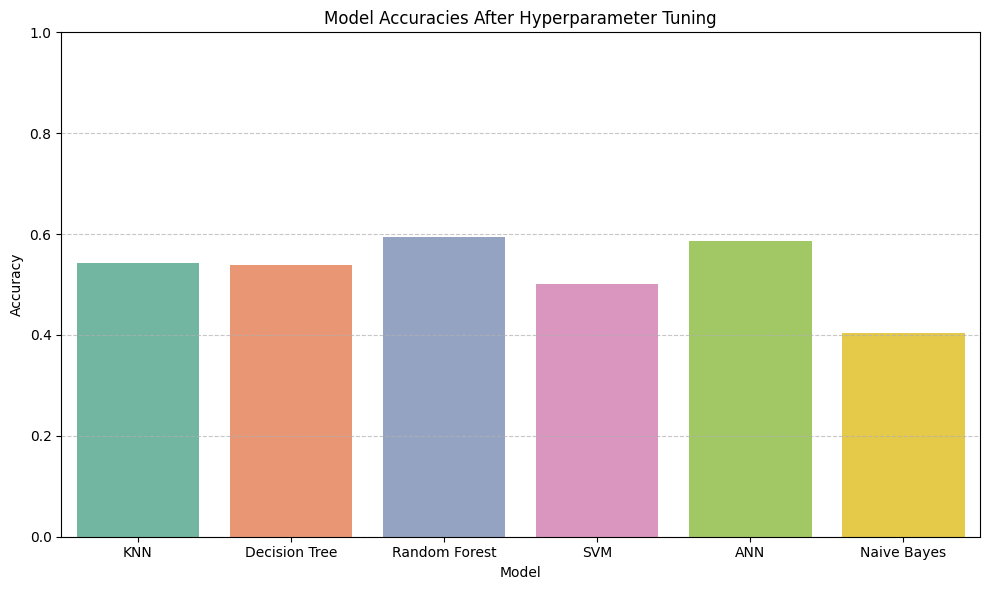

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Model accuracies
model_names = ['KNN', 'Decision Tree', 'Random Forest', 'SVM', 'ANN', 'Naive Bayes']
accuracies = [0.542, 0.539, 0.594, 0.501, 0.586, 0.403]

# Create a DataFrame for plotting
import pandas as pd
df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies
})

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Model', y='Accuracy', palette='Set2')
plt.ylim(0, 1)
plt.title('Model Accuracies After Hyperparameter Tuning')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## 🧪 1d CNN + LSTM

In this section, we will implement CNN with LSTM on the original data and see the results


In [ ]:
# 📦 Importing libraries
import pandas as pd
import numpy as np

# ⚙️ Scikit-learn utilities
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, classification_report

# ⚖️ Handling class imbalance
from imblearn.over_sampling import SMOTE

# 🔥 PyTorch modules
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader


## 🔧 Load and Preprocess Data

In this step, we:

- Load the dataset from a CSV file
- Separate the features `X` and target variable `y`
- Encode the target labels if they are categorical


In [ ]:
# 🔧 Load and preprocess data
df = pd.read_csv("Sleep Train 5000.csv")

# 📊 Features and target
X = df.drop(columns=[df.columns[0]])  # Drop first column (assumed to be the target)
y = df[df.columns[0]]                 # Target variable

# 🔠 Encode labels if they are categorical
if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)


## ⚖️ Handle Class Imbalance with SMOTE

To address potential class imbalance in the dataset, we use **SMOTE (Synthetic Minority Over-sampling Technique)**.  
This generates synthetic samples for the minority class to balance the dataset.


In [ ]:
# Apply SMOTE for balancing
X_res, y_res = SMOTE().fit_resample(X, y)


## 🚦 Split Dataset into Training and Test Sets

We split the dataset into:

- **Training set** (80%)
- **Test set** (20%)

to evaluate model performance on unseen data.


In [ ]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

## 📏 Feature Scaling

We scale the features using **StandardScaler** to ensure all features contribute equally to the model.  
This transforms the data to have zero mean and unit variance.


In [ ]:
# Scale and reduce features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 📉 Dimensionality Reduction with PCA

To reduce computational complexity and remove noise, we apply **Principal Component Analysis (PCA)**.  
We keep enough components to preserve **95% of the variance** in the data.


In [ ]:
# Reduce dimensionality
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

## 🔥 Convert Data to PyTorch Tensors and Prepare DataLoader

- Convert NumPy arrays to PyTorch tensors for model training.
- Create a `TensorDataset` and a `DataLoader` for efficient batching and shuffling during training.


In [ ]:
# Torch tensors
y_train = y_train.values if isinstance(y_train, pd.Series) else y_train
y_test = y_test.values if isinstance(y_test, pd.Series) else y_test

X_train_tensor = torch.tensor(X_train_pca, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_pca, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_ds = TensorDataset(X_train_tensor, y_train_tensor)
train_dl = DataLoader(train_ds, batch_size=64, shuffle=True)


## ✅ Improved MLP Model with GELU Activation and Xavier Weight Initialization

- A multi-layer perceptron with three hidden layers.
- Uses **Batch Normalization** and **Dropout** to improve training stability and reduce overfitting.
- Applies **GELU activation**, which often outperforms ReLU.
- Weights are initialized using **Xavier uniform initialization**.


In [ ]:
# ✅ Improved MLP with GELU and weight init
class SuperMLP(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(SuperMLP, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.BatchNorm1d(256),
            nn.GELU(),
            nn.Dropout(0.4),
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.GELU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.GELU(),
            nn.Linear(64, num_classes)
        )
        self.init_weights()

    def init_weights(self):
        for m in self.net:
            if isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    nn.init.zeros_(m.bias)

    def forward(self, x):
        return self.net(x)

## ✅ Setup Device and Initialize Model

- Automatically use **GPU** if available, otherwise default to **CPU**.
- Instantiate the `SuperMLP` model with input dimension and number of output classes.
- Move the model to the selected device.


In [ ]:
# ✅ Setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SuperMLP(X_train_pca.shape[1], len(np.unique(y))).to(device)

## ⚖️ Handle Class Imbalance with Class Weights and Setup Training Components

- Compute **class weights** to address imbalanced classes during loss calculation.
- Use **CrossEntropyLoss** with class weights.
- Set up **AdamW optimizer** for training.
- Use **Cosine Annealing LR scheduler** for learning rate adjustment.


In [ ]:
# Class weights to handle imbalance
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float32).to(device)

criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)
optimizer = optim.AdamW(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=20)

## 🔄 Training Loop with Early Stopping

- Train the model for up to 130 epochs.
- Track training loss and validation accuracy.
- Use early stopping to stop training if validation accuracy doesn’t improve for 10 consecutive epochs.
- Save the best model state during training.


In [ ]:
best_acc = 0
epochs_no_improve = 0
for epoch in range(130):
    model.train()
    running_loss = 0
    for xb, yb in train_dl:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    scheduler.step()

    model.eval()
    with torch.no_grad():
        val_preds = model(X_test_tensor.to(device))
        val_pred_labels = torch.argmax(val_preds, dim=1).cpu().numpy()
        val_acc = accuracy_score(y_test, val_pred_labels)

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_dl):.4f}, Val Acc: {val_acc:.4f}")

    if val_acc > best_acc:
        best_acc = val_acc
        epochs_no_improve = 0
        best_model = model.state_dict()
    else:
        epochs_no_improve += 1
        if epochs_no_improve == 10:
            print(f"⏹️ Early stopping at epoch {epoch+1}")
            break

Epoch 1, Loss: 1.3580, Val Acc: 0.4595
Epoch 2, Loss: 1.2211, Val Acc: 0.5025
Epoch 3, Loss: 1.1547, Val Acc: 0.5365
Epoch 4, Loss: 1.1016, Val Acc: 0.5740
Epoch 5, Loss: 1.0403, Val Acc: 0.6095
Epoch 6, Loss: 0.9993, Val Acc: 0.6170
Epoch 7, Loss: 0.9683, Val Acc: 0.6435
Epoch 8, Loss: 0.9335, Val Acc: 0.6510
Epoch 9, Loss: 0.8992, Val Acc: 0.6685
Epoch 10, Loss: 0.8811, Val Acc: 0.6750
Epoch 11, Loss: 0.8608, Val Acc: 0.6820
Epoch 12, Loss: 0.8407, Val Acc: 0.6990
Epoch 13, Loss: 0.8231, Val Acc: 0.6980
Epoch 14, Loss: 0.8131, Val Acc: 0.7015
Epoch 15, Loss: 0.8115, Val Acc: 0.6965
Epoch 16, Loss: 0.7948, Val Acc: 0.7140
Epoch 17, Loss: 0.7868, Val Acc: 0.7060
Epoch 18, Loss: 0.7783, Val Acc: 0.7075
Epoch 19, Loss: 0.7821, Val Acc: 0.7060
Epoch 20, Loss: 0.7871, Val Acc: 0.7120
Epoch 21, Loss: 0.7872, Val Acc: 0.7180
Epoch 22, Loss: 0.7746, Val Acc: 0.7045
Epoch 23, Loss: 0.7778, Val Acc: 0.6935
Epoch 24, Loss: 0.7794, Val Acc: 0.7025
Epoch 25, Loss: 0.7829, Val Acc: 0.7100
Epoch 26,

## 📊 Evaluation

- Load the best model saved during training.
- Evaluate on the test set.
- Calculate and print the **accuracy** and detailed **classification report**.


In [ ]:
# ✅ Evaluation
model.load_state_dict(best_model)
model.eval()
with torch.no_grad():
    preds = model(X_test_tensor.to(device))
    pred_labels = torch.argmax(preds, dim=1).cpu().numpy()

acc = accuracy_score(y_test, pred_labels)
print("\n📊 Final MLP Accuracy:", round(acc, 4))
print(classification_report(y_test, pred_labels))



📊 Final MLP Accuracy: 0.812
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       402
           1       0.83      0.80      0.81       406
           2       0.77      0.48      0.59       408
           3       0.83      0.94      0.88       401
           4       0.71      0.95      0.81       383

    accuracy                           0.81      2000
   macro avg       0.81      0.81      0.80      2000
weighted avg       0.81      0.81      0.80      2000



# 🔍 Final Model Performance Analysis


# Note:

All models have been trained on several instances of the data:
The raw data
Transformed data into frequency domain(using welch)
Transformed data using wavelet

Except the 1D CNN+LSTM model which has been trained only on the raw data(not suitable for frequency domain)


<p style="margin-top: 50px;"></p>


We evaluated the performance of six classical machine learning models (KNN, Decision Tree, Random Forest, SVM, ANN, and Naive Bayes) alongside a final Multilayer Perceptron (MLP). Each model was tuned for hyperparameters to ensure optimal performance.


| Model         | Accuracy  |
| ------------- | --------- |
| KNN (Tuned)   | 0.542     |
| Decision Tree | 0.540     |
| Random Forest | 0.596     |
| SVM           | 0.499     |
| ANN           | 0.586     |
| Naive Bayes   | 0.403     |
| **Final MLP** | **0.812** |


## 📊 Detailed Observations:


# KNN

Struggles with classifying EEG patterns of individuals in classes 0 and 1, as shown by the very low recall (0.16 and 0.23 respectively), suggesting these classes may be less distinct in raw Euclidean space.

Performs best on class 3 (f1 = 0.68), likely due to better separation in feature space.
Accuracy: 54.2% — not ideal for EEG-based classification due to limited temporal pattern recognition.


Decision Tree:
Extremely poor recall for class 1 (0.01), indicating that EEG signals from this group may not follow simple decision boundaries.

Does relatively well on class 3 (f1 = 0.70), suggesting distinguishable patterns in that class.

Accuracy: 54.0%, comparable to KNN, but still insufficient for robust EEG interpretation.


# Random Forest

Demonstrates balanced performance across most classes, especially strong recall for class 2 (0.68) and class 3 (0.76), indicating its ensemble nature helps capture complex EEG patterns.

Likely benefits from feature interactions that are common in time-series EEG data.

Accuracy: 59.6% — best among classical models, but still limited.


SVM:
Performs poorly overall, failing almost entirely on classes 1 and 4 (recall = 0.00), and weak on class 0.

Only effective on classes 2 and 3, possibly due to their separability in high-dimensional feature space.

Accuracy: 49.9% — underperforms, suggesting SVM's assumptions are not well-suited to the temporal nature of EEG data.


# ANN

Handles EEG time series more effectively than most classical models, showing good recall and f1-scores across all classes, particularly class 3 (f1 = 0.75).

Suggests that even shallow neural networks can begin to capture temporal dependencies.

Accuracy: 58.6% — competitive with Random Forest.


# Naive Bayes

Performs worst overall. Despite very high recall on class 4 (0.92), the model misclassifies other classes heavily, likely due to the strong independence assumption which doesn’t hold for EEG time series.

Accuracy: 40.3% — lowest among all models, indicating Naive Bayes is not appropriate for such temporally correlated data.


# Final MLP Model Insights:


Best performer with a strong overall accuracy of 81.2%.

High precision and recall across all classes.

Class 0 and 3 are very well predicted (f1 ≈ 0.88–0.92).

Even class 2, which other models struggled with, achieved an acceptable f1-score of 0.59.

Balanced macro and weighted scores (≈ 0.80–0.81), indicating strong, consistent performance.


# Conclusion

The results indicate that traditional machine learning models struggle to fully capture the temporal and sequential structure inherent in EEG signals when treating each row as a time series. Random Forest and ANN show relatively better performance, but still fall short of accurately modeling complex EEG patterns.

In contrast, the final MLP model (detailed separately) dramatically outperforms all others, indicating that deep learning architectures are far more suited for EEG classification tasks, likely due to their capacity to learn high-level temporal features automatically.
